# Analysis of Suicide in India

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# read csv file

df = pd.read_csv('Suicides in India 2001-2012.csv')

df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.duplicated().any()

False

In [5]:
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
178070,Puducherry,2005,Causes,Love Affairs,Female,45-59,0
113049,Karnataka,2009,Means_adopted,By Jumping off Moving Vehicles/Trains,Female,45-59,0
205424,Tamil Nadu,2005,Professional_Profile,House Wife,Female,15-29,647
199269,Sikkim,2006,Professional_Profile,Service (Private),Male,45-59,2
8338,Andhra Pradesh,2003,Professional_Profile,House Wife,Female,30-44,622
76359,Gujarat,2004,Means_adopted,By Self Infliction of injury,Female,60+,0
222456,Uttar Pradesh,2010,Causes,Illegitimate Pregnancy,Female,45-59,0
103363,Jharkhand,2004,Means_adopted,By Machine,Female,15-29,0
129904,Madhya Pradesh,2003,Means_adopted,By Drowning,Female,45-59,23
78366,Gujarat,2008,Causes,Other Causes (Please Specity),Female,45-59,27


In [6]:
df.Type_code.value_counts()

,count
Type_code,
Causes,109200
Means_adopted,67200
Professional_Profile,49263
Education_Status,7296
Social_Status,4560


In [7]:
df.Type.value_counts()

,count
Type,
Others (Please Specify),7263
Illness (Aids/STD),4200
By Drowning,4200
By touching electric wires,4200
By Machine,4200
...,...
Graduate,912
Middle,912
Bankruptcy or Sudden change in Economic Status,350


In [9]:
df.State.value_counts()

,count
State,
Madhya Pradesh,6792
Maharashtra,6792
Karnataka,6792
Odisha,6791
Andhra Pradesh,6791
Rajasthan,6791
Bihar,6790
Chhattisgarh,6790
Haryana,6790


In [10]:
df.Age_group.value_counts()

,count
Age_group,
15-29,45223
30-44,45193
45-59,45146
60+,45074
0-14,45027
0-100+,11856


In [11]:
# rename states

df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [13]:
# Drop rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [15]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') |
               (df.State == 'Total (States)')].index)

In [16]:
df.State.value_counts()

,count
State,
Andhra Pradesh,5185
Karnataka,5115
Tamil Nadu,5054
Madhya Pradesh,5029
Maharashtra,4958
Uttar Pradesh,4954
Gujarat,4856
West Bengal,4596
Kerala,4509


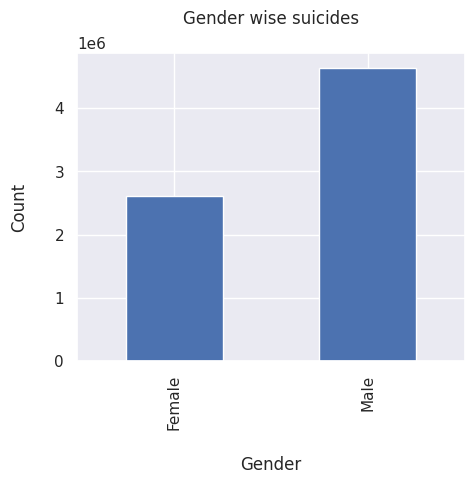

In [17]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot(kind="bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);

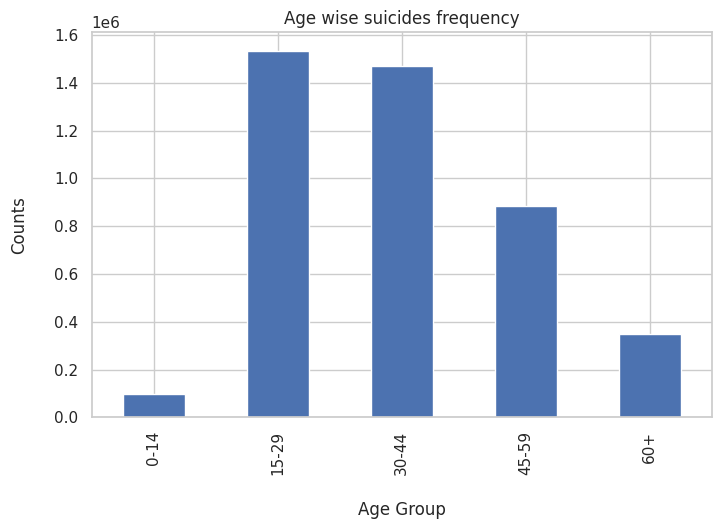

In [18]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot(kind="bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');


Middle Age group i.e between 15-44 have the highest number but, It' scary that even kids between age of 0 - 14 also commit suicide.

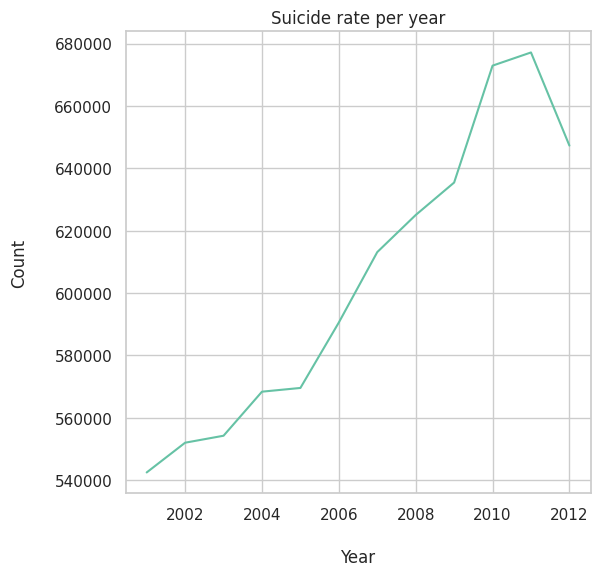

In [19]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

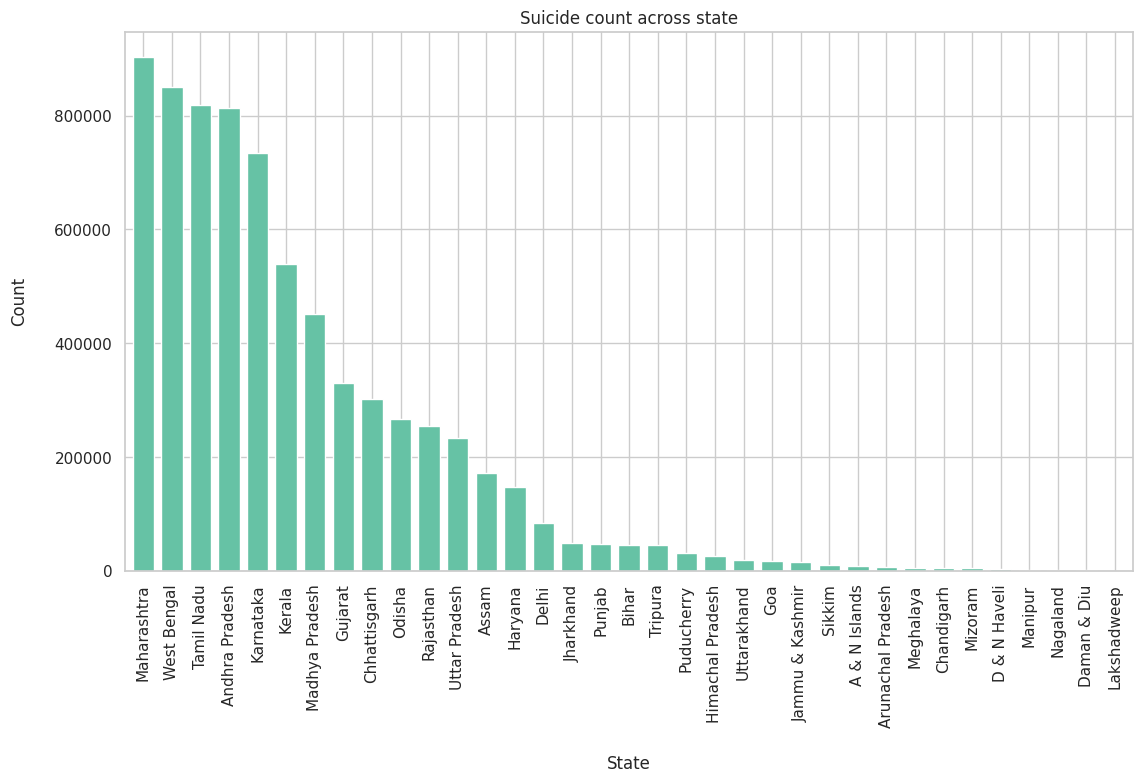

In [20]:
state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)

state_fig = sort_state.plot(kind='bar', figsize = (13,7), title = 'Suicide count across state', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

Maharashtra, West Bengal and Tamil Nadu have the highest rate of suicide.

In [23]:
cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [24]:
# function to plot

def plot_type(df, Title, X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title, width = 0.75)
    fig.set_xlabel(X_lab + '\n')
    fig.set_ylabel('Count')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');

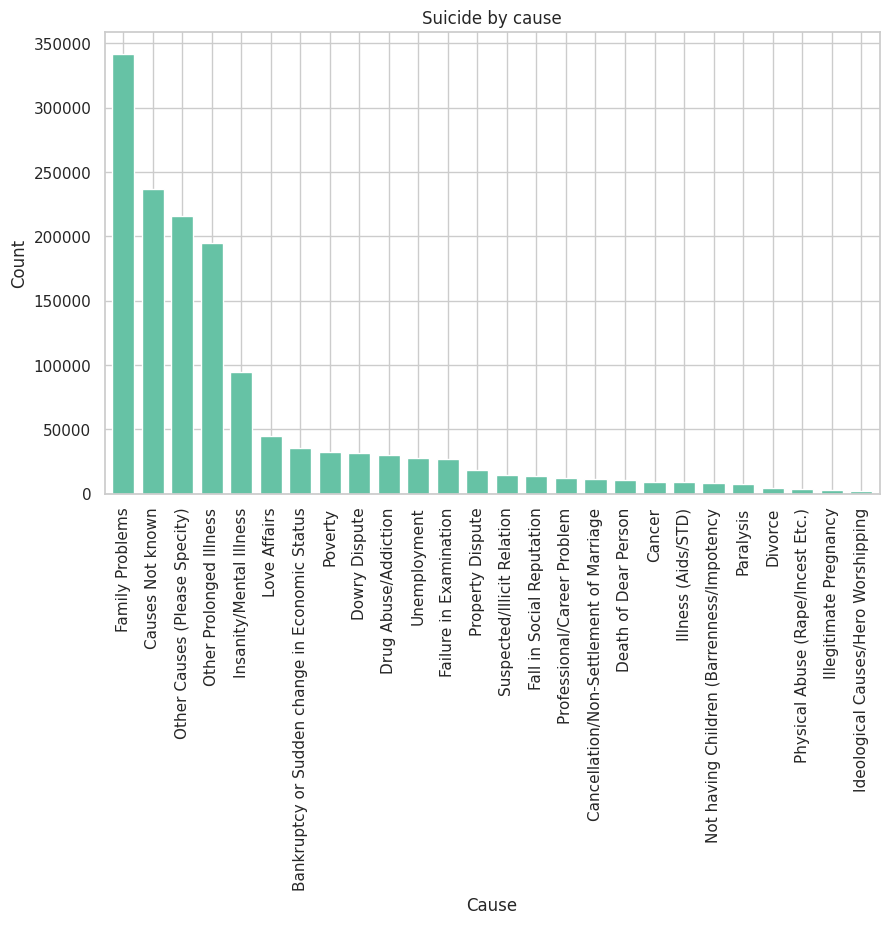

In [25]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')



Most of the cause are unknown but Family problems and Prolonged illness is at the top.


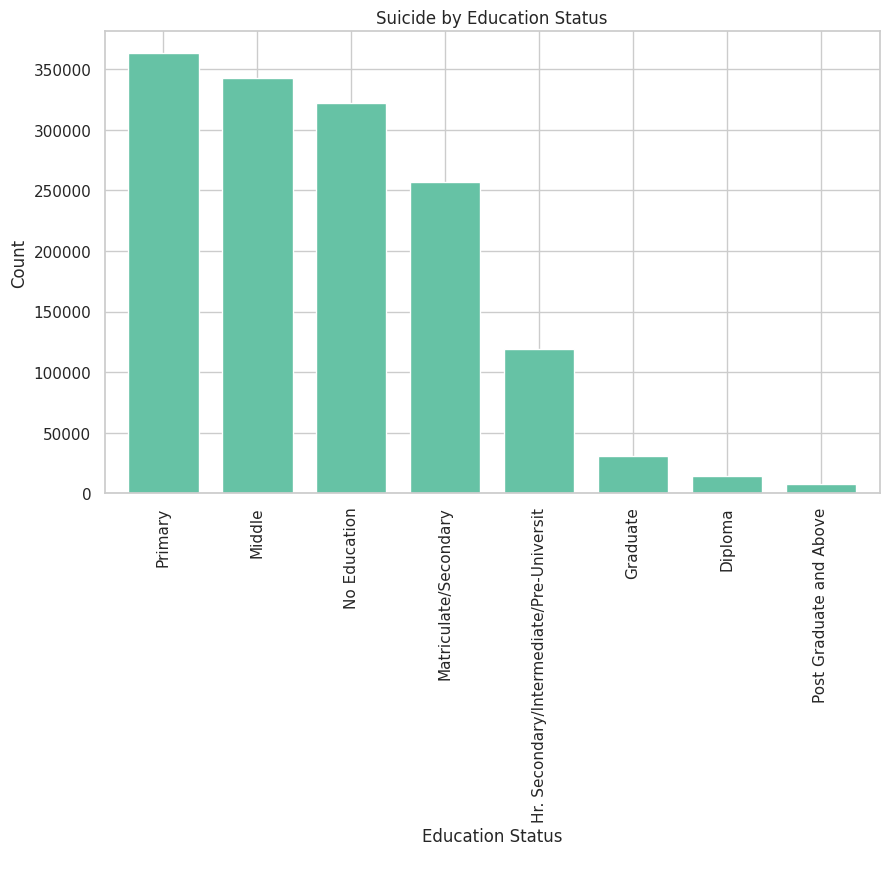

In [26]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')



People with primary or no education are high in number.


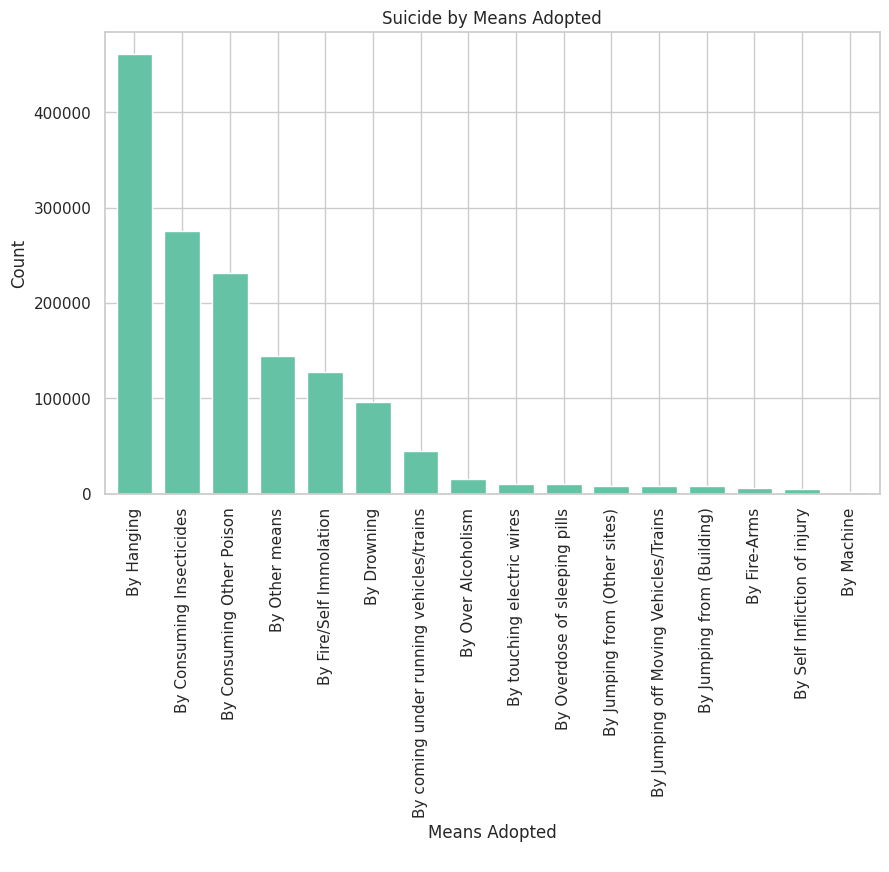

In [27]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

Hanging, Consuming Insecticides is more common but, most of other means are unknown.

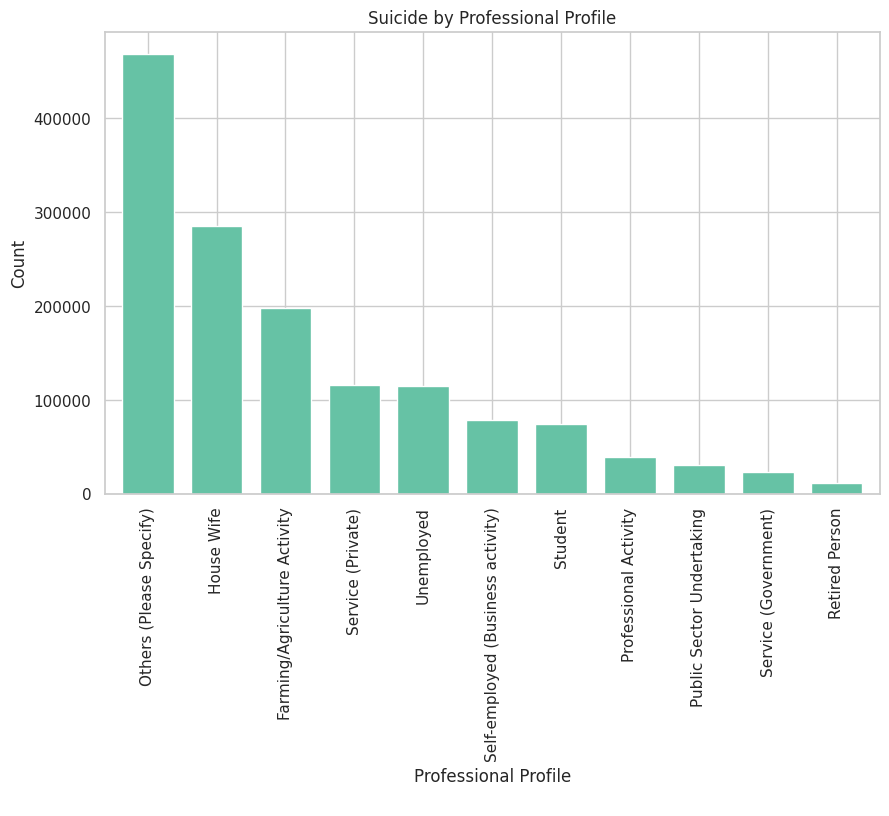

In [28]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

Most of the professional profile is unknown but house wife comes in second.

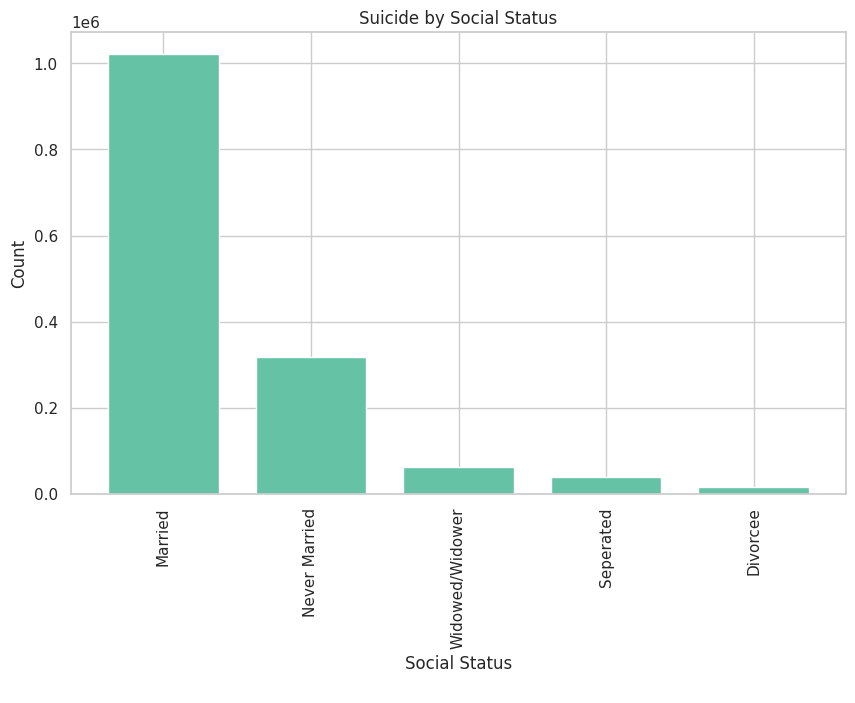

In [29]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)

Family Problems, House Wife and now Married these are at the top when it comes to the cause, professional profile and social status respectively.

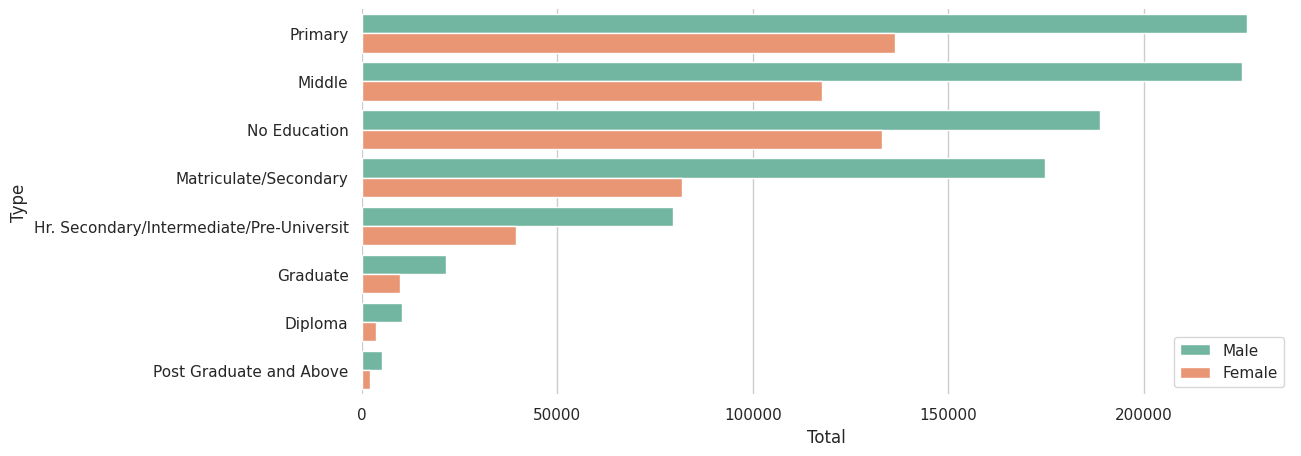

In [30]:
# Education Status by gender
plt.figure(figsize=(12,5))
edu_gen = edu_status.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
fig = sns.barplot(x = 'Total', y ='Type',hue='Gender', data = edu_gen)
sns.despine(left=True, bottom=True)
sns.set_style('whitegrid')
plt.legend(loc='lower right');

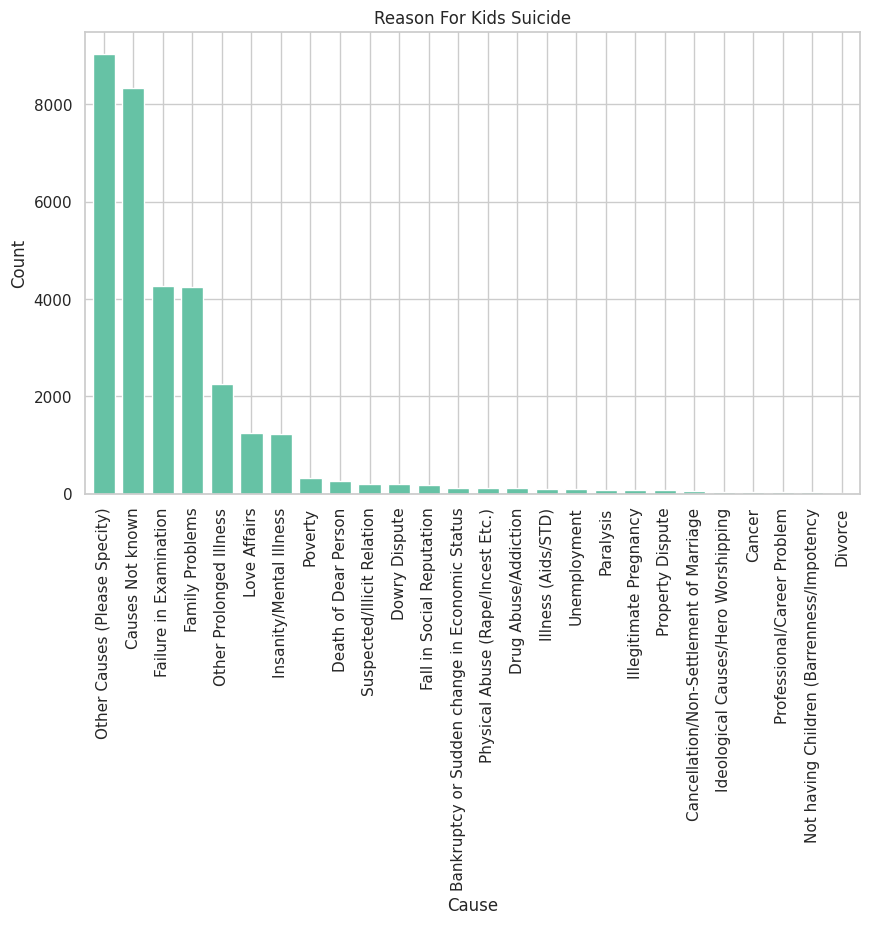

In [31]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

Most of cause is unknown but, Failure in Examination is at the top.

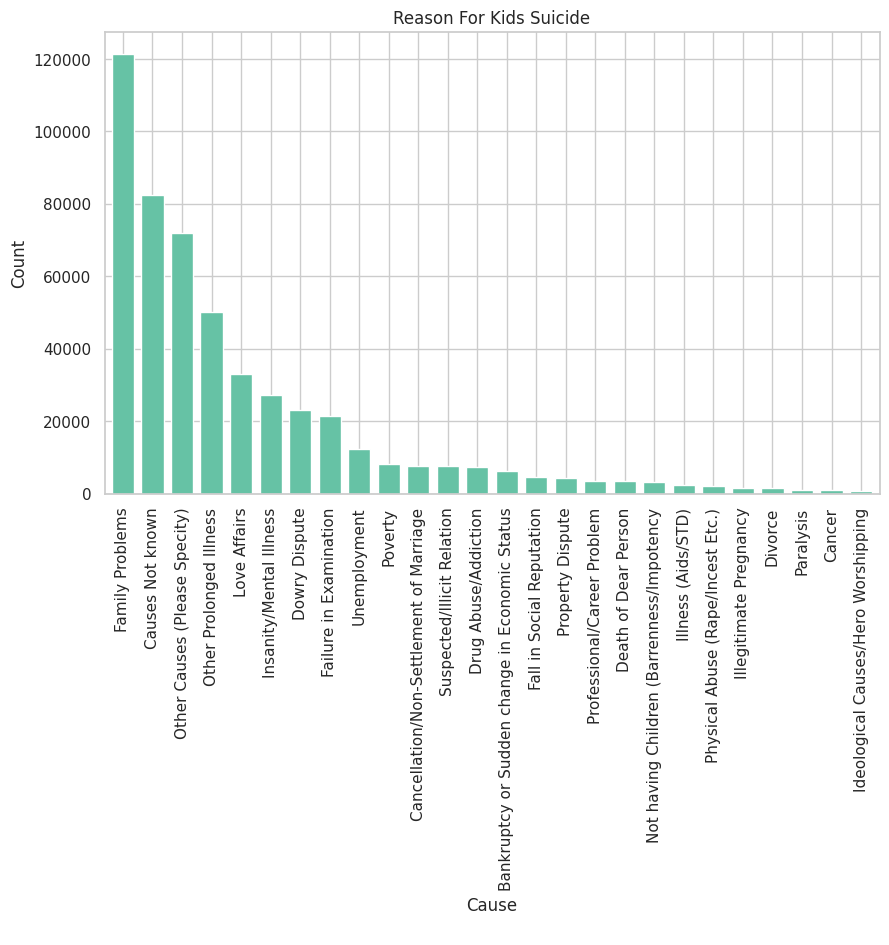

In [32]:
age_middle = df[df['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

Family Problems, Illness and Love affairs are at the top while, most of the reasons are unknown yet.